In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.drop('_c39',axis=1,inplace=True)

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [11]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


# visualization techniques:

<AxesSubplot:>

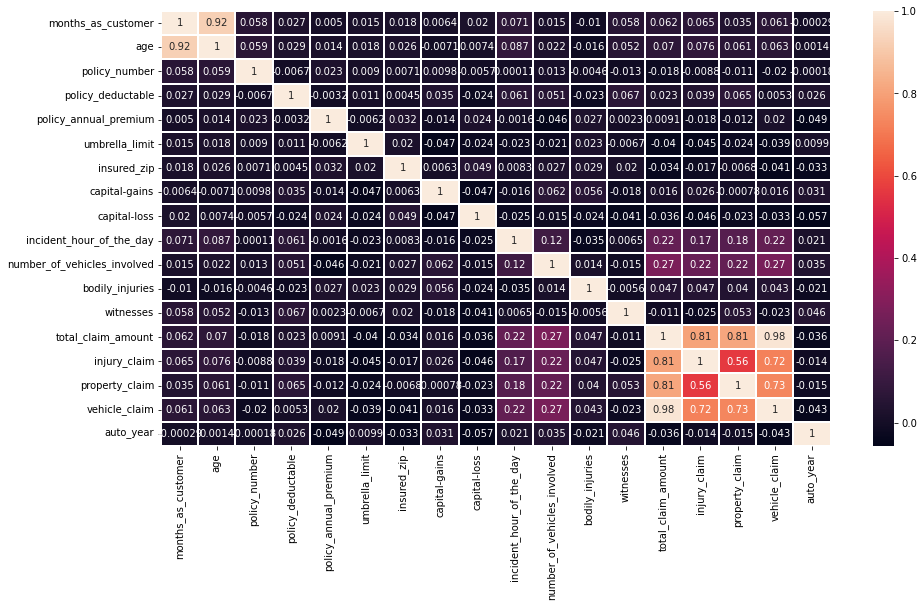

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidth=.3)

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

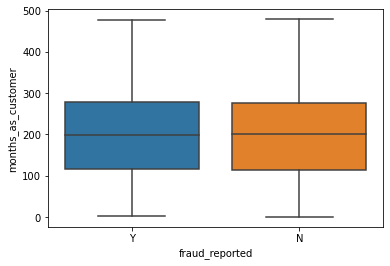

In [15]:
sns.boxplot(df.fraud_reported,df.months_as_customer,orient='v')

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

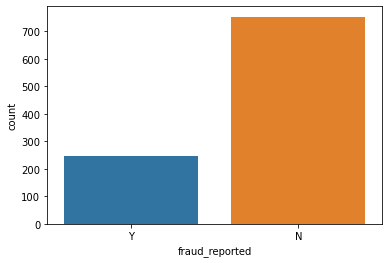

In [16]:
sns.countplot(df['fraud_reported'])

<AxesSubplot:xlabel='collision_type', ylabel='count'>

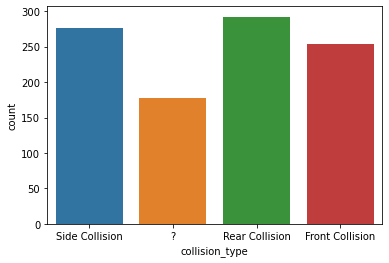

In [17]:
sns.countplot(df['collision_type'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

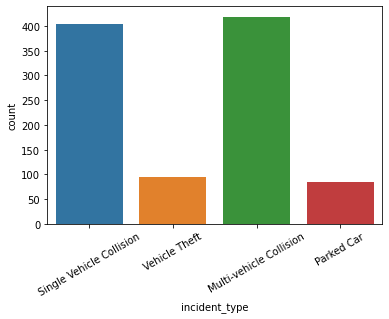

In [19]:
sns.countplot(df['incident_type'])
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

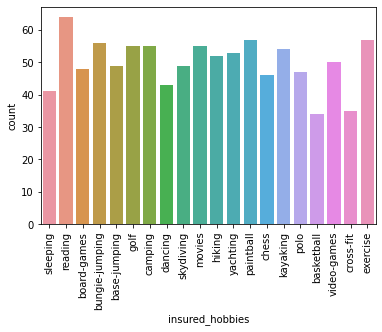

In [20]:
sns.countplot(df['insured_hobbies'])
plt.xticks(rotation=90)

# Grouping data

In [21]:
df.groupby('fraud_reported').agg({'months_as_customer':'std'})

,months_as_customer
fraud_reported,
N,113.574565
Y,119.824064


In [22]:
df['fraud_reported'] = pd.Series(map(lambda x: dict(Y=1, N=0)[x],
              df['fraud_reported'].values.tolist()), df.index)

In [23]:
df.groupby('fraud_reported').agg({'months_as_customer':'std'})

,months_as_customer
fraud_reported,
0,113.574565
1,119.824064


<AxesSubplot:xlabel='policy_state', ylabel='count'>

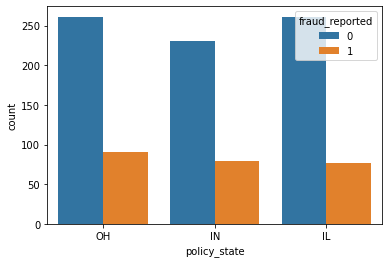

In [24]:
sns.countplot(df.policy_state,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='incident_city', ylabel='count'>

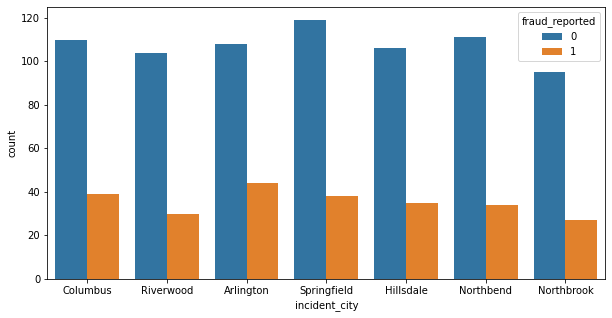

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df.incident_city,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='incident_state', ylabel='count'>

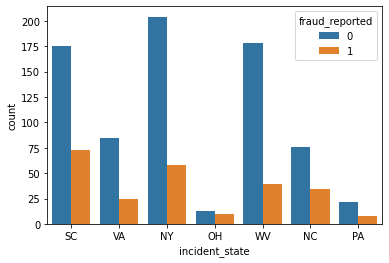

In [26]:
sns.countplot(df.incident_state,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='incident_type', ylabel='count'>

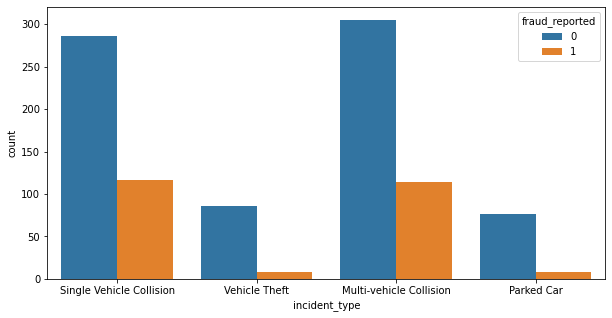

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df.incident_type,orient='v',hue=df['fraud_reported'])

In [28]:
df['pin']= df["incident_location"].str.slice(0,4,1)
df.drop('incident_location',axis=1,inplace=True)
df['pin']

0      9935
1      6608
2      7121
3      6956
4      3041
       ... 
995    6045
996    3092
997    7629
998    6128
999    1416
Name: pin, Length: 1000, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

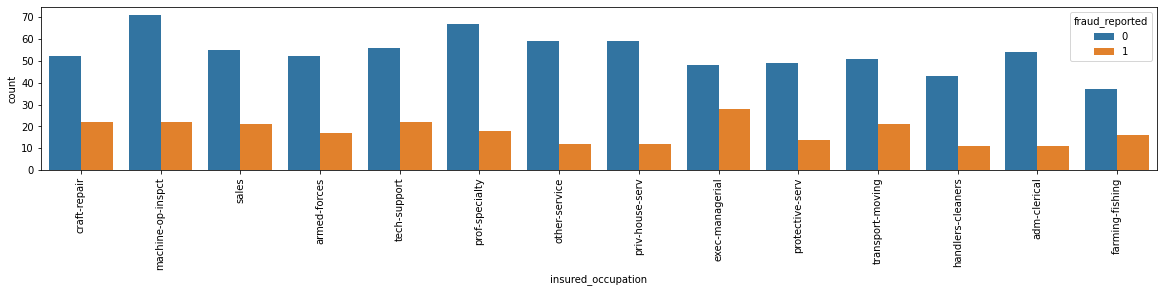

In [29]:
plt.figure(figsize=(20,3))
sns.countplot(df.insured_occupation,orient='v',hue=df['fraud_reported'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

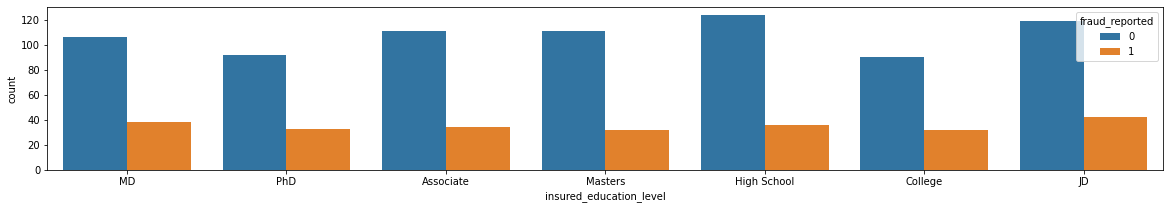

In [30]:
plt.figure(figsize=(20,3))
sns.countplot(df.insured_education_level,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

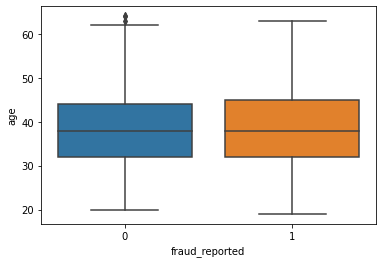

In [33]:
sns.boxplot(df.fraud_reported,df.age,orient='v')

<AxesSubplot:xlabel='age_bin', ylabel='count'>

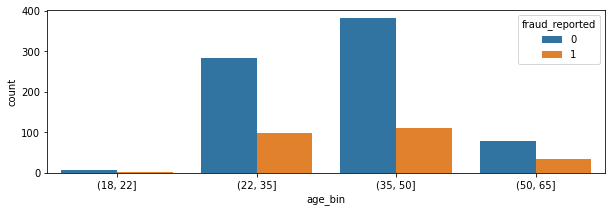

In [34]:
bins = [18, 22, 35, 50, 65]
df['age_bin'] = pd.cut(df['age'], bins)
df.drop('age',axis=1,inplace=True)
plt.figure(figsize=(10,3))
sns.countplot(df.age_bin,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_age'>

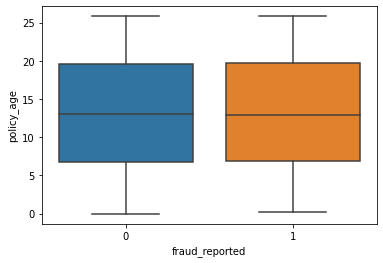

In [35]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['policy_age'] = df['incident_date'] - df['policy_bind_date']
df['policy_age'] = df['policy_age'].astype('str')
df['policy_age'] = df['policy_age'].str.slice(0,-5,1)
sns.boxplot(df.fraud_reported,df.policy_age.astype('int')/365,orient='v')

<AxesSubplot:xlabel='policy_age_bin', ylabel='count'>

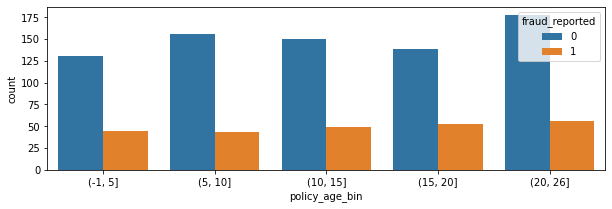

In [36]:
df['policy_age'].astype('int').max()/365
bins = [-1, 5, 10, 15, 20, 26]
df['policy_age_bin'] = pd.cut(df['policy_age'].astype('int')/365, bins)
df.drop('policy_age',axis=1,inplace=True)
plt.figure(figsize=(10,3))
sns.countplot(df.policy_age_bin,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

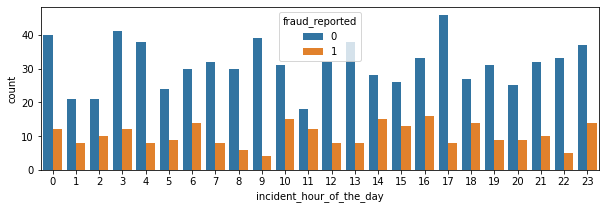

In [37]:
plt.figure(figsize=(10,3))
sns.countplot(df.incident_hour_of_the_day,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='auto_make', ylabel='count'>

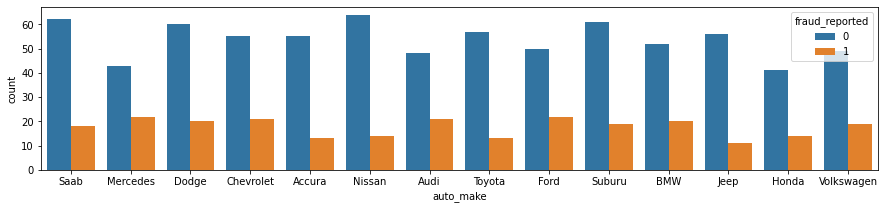

In [38]:
plt.figure(figsize=(15,3))
sns.countplot(df.auto_make,orient='v',hue=df['fraud_reported'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

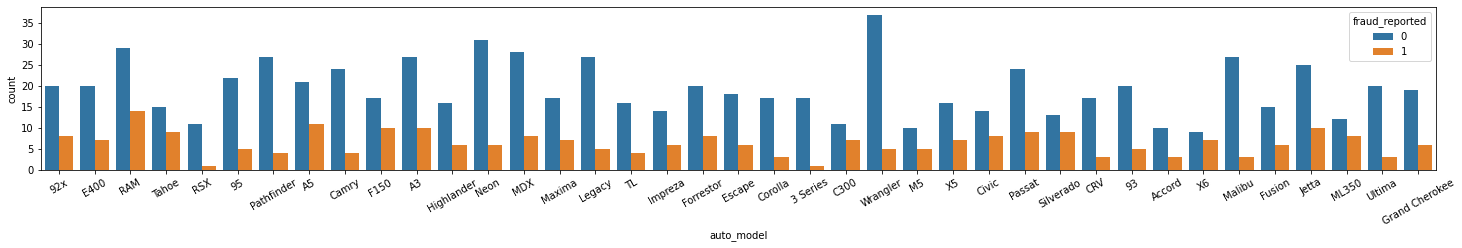

In [39]:
plt.figure(figsize=(25,3))
sns.countplot(df.auto_model,orient='v',hue=df['fraud_reported'])
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Saab_92x'),
  Text(1, 0, 'Mercedes_E400'),
  Text(2, 0, 'Dodge_RAM'),
  Text(3, 0, 'Chevrolet_Tahoe'),
  Text(4, 0, 'Accura_RSX'),
  Text(5, 0, 'Saab_95'),
  Text(6, 0, 'Nissan_Pathfinder'),
  Text(7, 0, 'Audi_A5'),
  Text(8, 0, 'Toyota_Camry'),
  Text(9, 0, 'Ford_F150'),
  Text(10, 0, 'Audi_A3'),
  Text(11, 0, 'Toyota_Highlander'),
  Text(12, 0, 'Dodge_Neon'),
  Text(13, 0, 'Accura_MDX'),
  Text(14, 0, 'Nissan_Maxima'),
  Text(15, 0, 'Suburu_Legacy'),
  Text(16, 0, 'Accura_TL'),
  Text(17, 0, 'Suburu_Impreza'),
  Text(18, 0, 'Suburu_Forrestor'),
  Text(19, 0, 'Ford_Escape'),
  Text(20, 0, 'Toyota_Corolla'),
  Text(21, 0, 'BMW_3 Series'),
  Text(22, 0, 'Mercedes_C300'),
  Text(23, 0, 'Jeep_Wrangler'),
  Text(24, 0, 'BMW_M5'),
  Text(25, 0, 'BMW_X5'),
  Text(26, 0, 'Honda_Civic'),
  Text(27, 0,

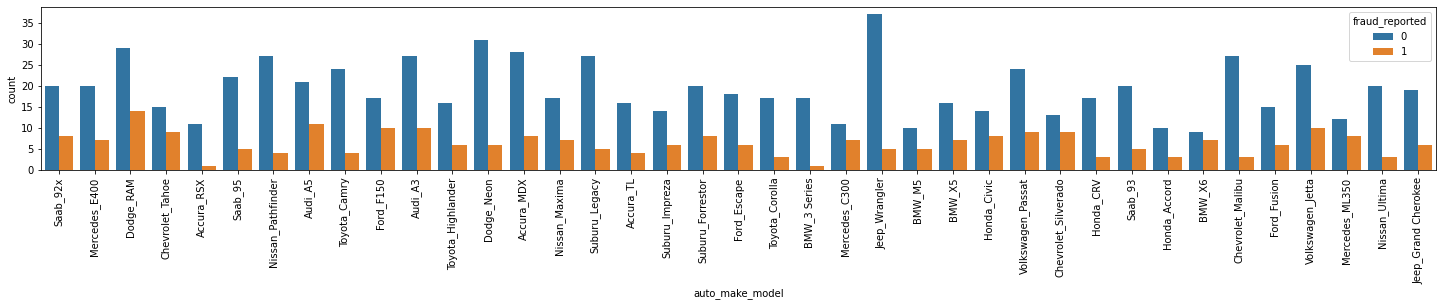

In [40]:
df['auto_make_model']=df['auto_make']+'_'+df['auto_model']
plt.figure(figsize=(25,3))
sns.countplot(df.auto_make_model,orient='v',hue=df['fraud_reported'])
plt.xticks(rotation=90)

In [41]:
df.drop(['auto_make','auto_model'],axis=1,inplace=True)

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

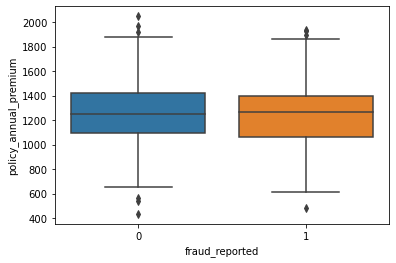

In [42]:
sns.boxplot(df.fraud_reported,df.policy_annual_premium,orient='v')

<AxesSubplot:xlabel='premium_bin', ylabel='count'>

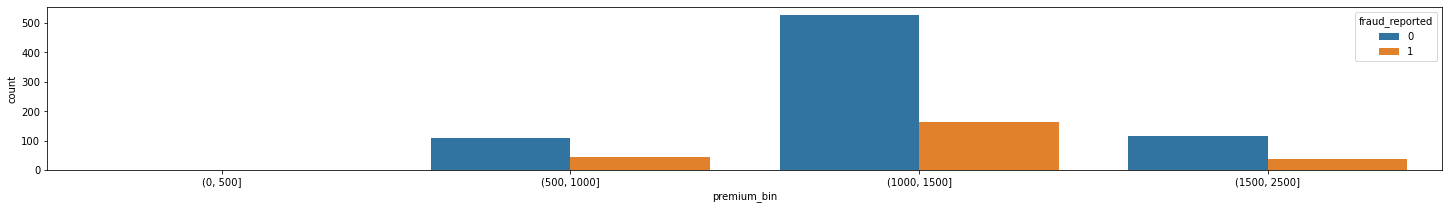

In [43]:
bins = [0, 500, 1000, 1500, 2500]
df['premium_bin'] = pd.cut(df['policy_annual_premium'], bins)
df.drop('policy_annual_premium',axis=1,inplace=True)
plt.figure(figsize=(25,3))
sns.countplot(df.premium_bin,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

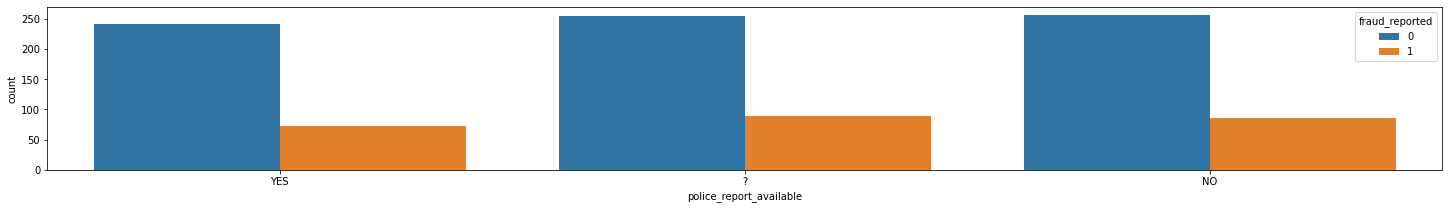

In [44]:
plt.figure(figsize=(25,3))
sns.countplot(df.police_report_available,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='witnesses', ylabel='count'>

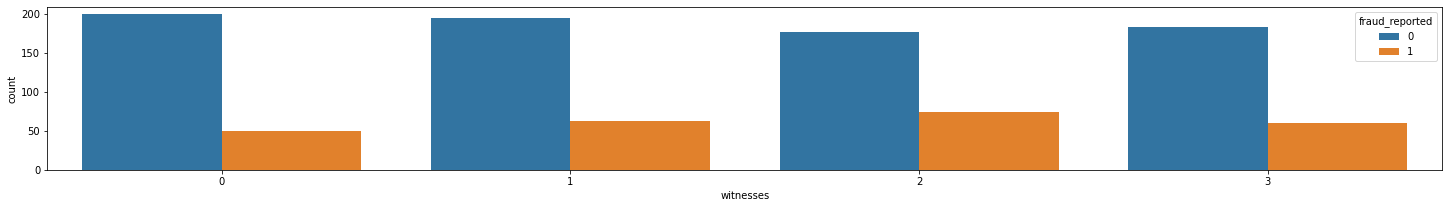

In [45]:
plt.figure(figsize=(25,3))
sns.countplot(df.witnesses,orient='v',hue=df['fraud_reported'])

# Grouping data

In [31]:
df1 = df.groupby('insured_hobbies')['fraud_reported'].value_counts().unstack().reset_index()
df1

fraud_reported,insured_hobbies,0,1
0,base-jumping,36,13
1,basketball,28,6
2,board-games,34,14
3,bungie-jumping,47,9
4,camping,50,5
5,chess,8,38
6,cross-fit,9,26
7,dancing,38,5
8,exercise,46,11
9,golf,49,6


In [32]:
df1['ratio_1/0'] = df1[1]/df1[0]
df1

fraud_reported,insured_hobbies,0,1,ratio_1/0
0,base-jumping,36,13,0.361111
1,basketball,28,6,0.214286
2,board-games,34,14,0.411765
3,bungie-jumping,47,9,0.191489
4,camping,50,5,0.100000
5,chess,8,38,4.750000
6,cross-fit,9,26,2.888889
7,dancing,38,5,0.131579
8,exercise,46,11,0.239130
9,golf,49,6,0.122449


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   policy_number                1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   umbrella_limit               1000 non-null   int64         
 7   insured_zip                  1000 non-null   int64         
 8   insured_sex                  1000 non-null   object        
 9   insured_education_level      1000 non-null   object        
 10  insured_occupation           1000 non-null   object        
 11  insured_hobbies              1000 non-null  

In [49]:
df.drop('total_claim_amount',axis=1,inplace=True)

# CHECKING NUMERICAL AND CATEGORICAL VALUES

In [51]:
x = df.copy().drop("fraud_reported",axis=1)
y = df["fraud_reported"]
num_cols = ['capital-gains','capital-loss','injury_claim', 'property_claim', 'vehicle_claim']
cat_cols = x.columns.difference(num_cols)

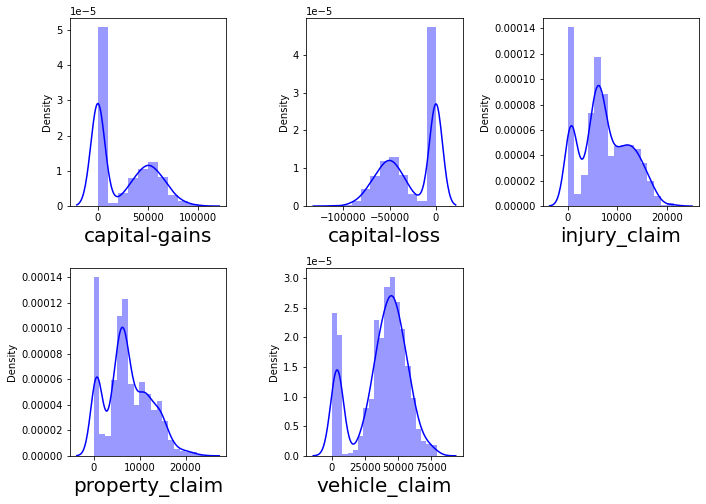

In [53]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_cols:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# LABEL ENCODING

In [54]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_cols]= df[cat_cols].apply(LE.fit_transform)

In [55]:
df[cat_cols]

,age_bin,authorities_contacted,auto_make_model,auto_year,bodily_injuries,collision_type,incident_city,incident_date,incident_hour_of_the_day,incident_severity,...,policy_age_bin,policy_bind_date,policy_csl,policy_deductable,policy_number,policy_state,premium_bin,property_damage,umbrella_limit,witnesses
0,2,4,28,9,1,3,1,15,5,0,...,0,941,1,1,480,2,2,2,1,2
1,2,4,23,12,0,0,5,11,8,1,...,1,639,1,2,257,1,2,0,5,0
2,1,4,13,12,2,2,1,33,7,1,...,2,405,0,2,672,2,2,1,5,3
3,2,4,11,19,1,1,0,54,5,0,...,4,19,1,2,140,0,2,0,6,2
4,2,2,1,14,0,0,0,28,20,1,...,0,926,2,1,286,0,3,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,17,11,0,1,4,33,20,1,...,4,70,2,1,935,2,2,2,1,1
996,2,1,38,20,2,2,3,14,23,0,...,0,919,0,1,101,0,2,2,1,3
997,1,4,32,1,2,3,0,13,4,1,...,2,514,1,0,902,2,2,0,3,3
998,3,3,4,3,0,2,0,37,2,0,...,0,832,2,2,500,0,2,0,5,1


# OUTLIERS

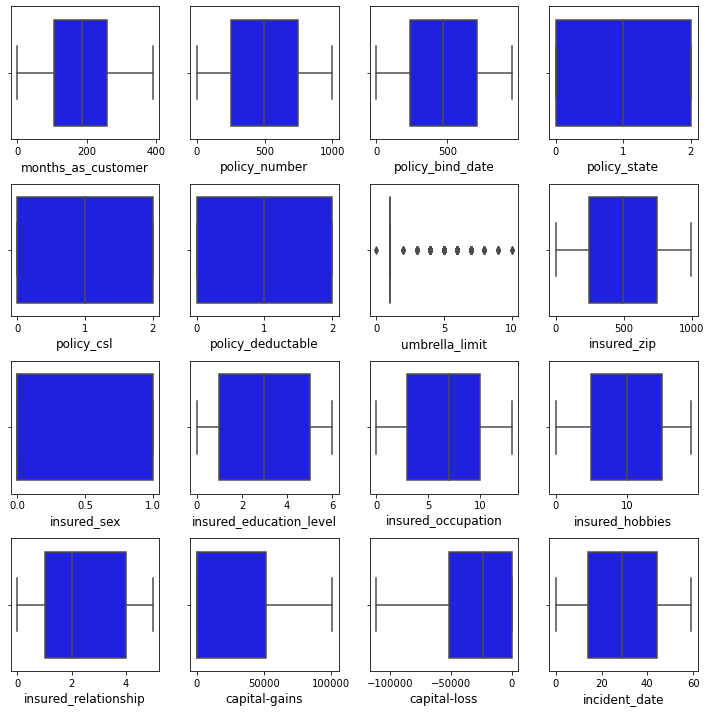

In [56]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [57]:
feature=df[['umbrella_limit']]

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(feature))
z

,umbrella_limit
0,0.469668
1,1.617746
2,1.617746
3,2.139600
4,2.139600
...,...
995,0.469668
996,0.469668
997,0.574039
998,1.617746


# STANDARDIZATION TECHNIQUES

In [59]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [60]:
x = df.copy().drop("fraud_reported",axis=1)
y = df["fraud_reported"]

In [61]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,injury_claim,property_claim,vehicle_claim,auto_year,pin,age_bin,policy_age_bin,auto_make_model,premium_bin
0,1.148951,-0.067550,1.715617,1.187173,0.060937,0.043487,-0.469668,-0.035945,1.076953,0.530931,...,1.270313,-0.189283,1.165505,0.749653,-0.183440,1.711958,0.427535,-1.486100,0.758301,0.001787
1,0.277600,-0.840045,0.614364,-0.016856,0.060937,1.285962,1.617746,0.078984,1.076953,0.530931,...,-1.198712,-1.363822,-1.372696,-1.823346,0.315491,0.442663,0.427535,-0.781787,0.318706,0.001787
2,-0.613781,0.597558,-0.238924,1.187173,-1.182668,1.285962,1.617746,-1.707646,-0.928546,1.557877,...,0.035801,0.054644,-0.736072,-0.785565,0.315491,0.641913,-1.062133,-0.077474,-0.560483,0.001787
3,0.548019,-1.245345,-1.646486,-1.220886,0.060937,1.285962,2.139600,1.099418,-0.928546,1.557877,...,0.035801,-0.224130,-0.219722,0.677607,1.479664,0.586565,0.427535,1.331151,-0.736321,0.001787
4,0.277600,-0.739586,1.660919,-1.220886,1.304542,0.043487,2.139600,1.231761,1.076953,-1.522961,...,0.035801,-1.257232,-1.399654,-1.768252,0.648112,-0.970535,0.427535,-1.486100,-1.615511,1.789215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.815644,1.508617,-1.460513,1.187173,1.304542,0.043487,-0.469668,-1.662370,-0.928546,1.044404,...,-1.198712,2.051155,0.273817,1.224309,0.149180,0.206515,0.427535,1.331151,-0.208808,0.001787
996,0.818439,-1.380445,1.635393,-1.220886,-1.182668,0.043487,-0.469668,1.102901,-0.928546,1.557877,...,-1.198712,2.182342,2.214794,1.821868,1.645974,-0.944706,0.427535,-1.486100,1.637491,0.001787
997,-0.653843,1.394302,0.158548,1.187173,0.060937,-1.198989,0.574039,-1.098172,-0.928546,1.044404,...,1.270313,0.013648,0.020826,0.771902,-1.513924,0.859611,-1.062133,-0.077474,1.109977,0.001787
998,1.930162,0.001732,1.318145,-1.220886,1.304542,1.285962,1.617746,-1.181757,1.076953,-1.522961,...,1.270313,-0.453708,-0.451976,-0.073580,-1.181303,0.236033,1.917203,-1.486100,-1.351754,0.001787


# MULTI-COLINEARITY

In [62]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,3.552390,months_as_customer
1,1.025197,policy_number
2,24.703059,policy_bind_date
3,1.040792,policy_state
4,1.032255,policy_csl
5,1.046582,policy_deductable
6,1.036587,umbrella_limit
7,1.036756,insured_zip
8,1.031009,insured_sex
9,1.041533,insured_education_level


# TRAIN_TEST_SPLIT

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [64]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.5182120582120582 Random_State 95


In [65]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)

In [66]:
LR = LinearRegression()
rf=RandomForestRegressor()
knn=KNN()
gb=GradientBoostingRegressor()
br=BaggingRegressor()

In [67]:
LR.fit(x_train,y_train)

predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

print('MAE:',metrics.mean_absolute_error(y_test, predLR))

print('MSE:',metrics.mean_squared_error(y_test, predLR))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.17637215794462002
MAE: 0.32432542262483
MSE: 0.1584659968114551
RMSE: 0.3980778778222361


In [68]:
rf.fit(x_train,y_train)

predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

print('MAE:',metrics.mean_absolute_error(y_test, predrf))

print('MSE:',metrics.mean_squared_error(y_test, predrf))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.5242134442134443
MAE: 0.20453333333333334
MSE: 0.09154133333333334
RMSE: 0.3025579834235635


In [69]:
knn.fit(x_train,y_train)

predknn=knn.predict(x_test)
print('R2_score:',r2_score(y_test,predknn))

print('MAE:',metrics.mean_absolute_error(y_test, predknn))

print('MSE:',metrics.mean_squared_error(y_test, predknn))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_score: -0.021483021483021725
MAE: 0.32933333333333337
MSE: 0.19653333333333337
RMSE: 0.44332080182790135


In [70]:
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_score:',r2_score(y_test,predbr))

print('MAE:',metrics.mean_absolute_error(y_test, predbr))

print('MSE:',metrics.mean_squared_error(y_test, predbr))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_score: 0.4636174636174636
MAE: 0.21333333333333332
MSE: 0.1032
RMSE: 0.3212475680841802


# CROSS-VALIDATION

In [71]:
print(cross_val_score(LR,x,y,cv=5).mean())

print(cross_val_score(rf,x,y,cv=5).mean())

print(cross_val_score(knn,x,y,cv=5).mean())

print(cross_val_score(gb,x,y,cv=5).mean())

print(cross_val_score(br,x,y,cv=5).mean())

0.11291872247056647
0.3791944908481384
-0.03754443910203074
0.38226405879180814
0.3159898029109397


# OVERSAMPLING

In [72]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [73]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# LOGISTIC REGRESSION

In [82]:
log = LogisticRegression()
log.fit(x_train,y_train)
predlog = log.predict(x_test)

print(accuracy_score(y_test, predlog))
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

0.7933333333333333
[[209  13]
 [ 49  29]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       222
           1       0.69      0.37      0.48        78

    accuracy                           0.79       300
   macro avg       0.75      0.66      0.68       300
weighted avg       0.78      0.79      0.77       300



# RANDOM FOREST CLASSIFIER

In [83]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.7866666666666666
[[216   6]
 [ 58  20]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       222
           1       0.77      0.26      0.38        78

    accuracy                           0.79       300
   macro avg       0.78      0.61      0.63       300
weighted avg       0.78      0.79      0.74       300



# DECISION TREE CLASSIFIER

In [84]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.78
[[186  36]
 [ 30  48]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       222
           1       0.57      0.62      0.59        78

    accuracy                           0.78       300
   macro avg       0.72      0.73      0.72       300
weighted avg       0.79      0.78      0.78       300



# GRADIENT BOOSTING CLASSIFIER

In [85]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8333333333333334
[[204  18]
 [ 32  46]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       222
           1       0.72      0.59      0.65        78

    accuracy                           0.83       300
   macro avg       0.79      0.75      0.77       300
weighted avg       0.83      0.83      0.83       300



# SUPPORT VECTOR MACHINE CLASSIFIER

In [87]:
svc = SVC()
svc.fit(x_train,y_train)

predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.74
[[222   0]
 [ 78   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       222
           1       0.00      0.00      0.00        78

    accuracy                           0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300



# Thus the above observation,the difference betweeen accuracy score and cross validation score
we conclude that GradientBoostingClassifier as our best fitting model

# HYPERPARAMETER TUNNING FOR THE MODEL WITH BEST SCORE

In [88]:
parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [89]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [90]:
fraud_reported =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fraud_reported.fit(x_train, y_train)
pred =fraud_reported.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

76.0
